# Fully connected NN
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_11_neural_networks_2/fully_connected.ipynb)



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


In [3]:
train_images.shape



(60000, 28, 28)

In [4]:
test_images.shape


(10000, 28, 28)

In [5]:
train_images = train_images / 255.0 - 0.5

test_images = test_images / 255.0 - 0.5


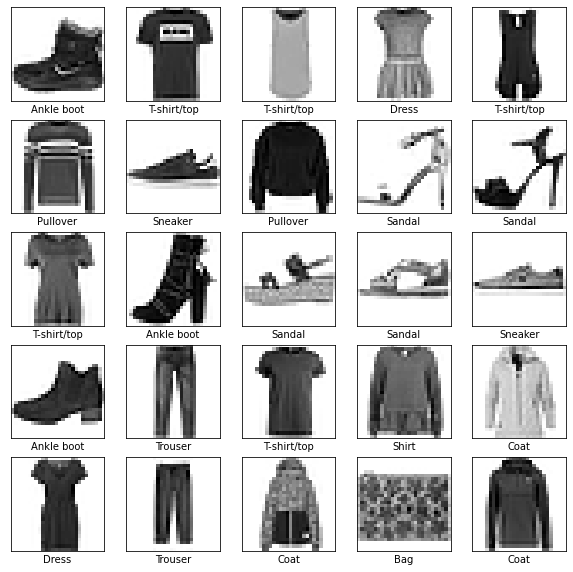

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



## Build a NN model
`keras.Sequential`: the simplest "one-after-the-other" layer architecture



In [7]:
model = keras.Sequential(
    [
        # keras.layers.Input(shape=(28,28)),
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)


## model.compile()
- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.



In [8]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)



In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6042 - accuracy: 0.7875
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3863 - accuracy: 0.8597
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3377 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3100 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2927 - accuracy: 0.8919


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy:", test_acc)



313/313 [==============================] - 0s 996us/step - loss: 0.3664 - accuracy: 0.8702

Test accuracy: 0.870199978351593


In [11]:
predictions = model.predict(test_images)



In [12]:
predictions[0]


array([2.4804832e-08, 7.1859505e-09, 2.3691520e-08, 2.2070585e-08,
       4.1110148e-08, 8.4324619e-03, 1.3922845e-07, 4.5375936e-03,
       2.9075496e-08, 9.8702967e-01], dtype=float32)

In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")




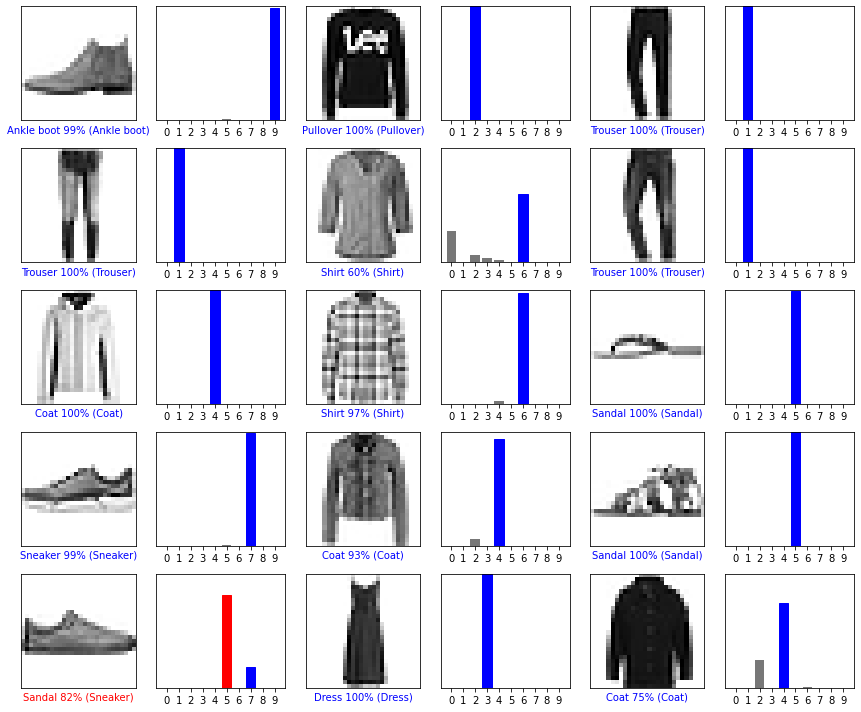

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [15]:
img = test_images[1]

print(img.shape)
try:
    predictions_single = model.predict(img)
except:
    print("not working...")


(28, 28)
not working...


In [16]:
# Add the image to a batch where it's the only member.
img = np.expand_dims(img, 0)

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)



(1, 28, 28)
[[1.2802799e-05 2.5260006e-11 9.9933976e-01 4.3733874e-11 6.0629460e-04
  4.9910942e-09 4.1237075e-05 1.2842745e-15 7.4803323e-11 2.2116185e-13]]
